## Cleaning and Understanding Bike Share Data

#### Written by David Terpay
This file will clean all of our data and find any insightful information about our dataset.

#### Import all files here

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as plt
import googlemaps
import re
import seaborn as sns
key = 'ENTER KEY HERE'
# gmaps = googlemaps.Client(key=key)

#### Declaring all functions here

In [2]:
def dayFromStart(date):
    date_format = "%Y-%m-%d"
    start = datetime.strptime('2016-07-07', date_format)
    end = datetime.strptime(date, date_format)
    return (end - start).days

def address_finder(latitude, longitude):
    location = gmaps.reverse_geocode((latitude, longitude))
    number = location[1]['address_components'][0]["long_name"] # Number of building
    street = location[1]['address_components'][1]["long_name"] # Street
    city = "Los Angeles" # City
    state = "California" # State
    country  = "United States" # Country
    return f"{number} {street} {city}, {state}, {country}"

def distance_traveled(startlat, startlon, destinationlat, destinationlong):
    now = datetime.now()
    start = address_finder(startlat, startlon)
    finish = address_finder(destinationlat, destinationlong)
    result = gmaps.directions(start, finish, mode="bicycling", departure_time=now)
    return float(result[0]["legs"][0]["distance"]["value"]) / 1609.334
    
def time_taken(startlat, startlon, destinationlat, destinationlong, mode):
    now = datetime.now()
    result = gmaps.distance_matrix((startlat, startlon), (destinationlat, destinationlong), mode = mode)
    return result

def total_time_difference():
    difference = 0
    for index, row in dataFrame.iterrows():
        if row[10] == "One Way":
            startlat = float(row[4])
            startlog = float(row[5])
            destinationlat = float(row[7])
            destinationlog = float(row[8])
            mat = gmaps.distance_matrix((startlat, startlog), (destinationlat, destinationlog))
            try:
                sumDistances += mat["rows"][0]["elements"][0]["distance"]["value"]
            except KeyError:
                continue
        if index % 100 == 0:
            print(index)
        
    return sumDistances / 1609.334

def total_distance():
    sumDistances = 0
    for index, row in dataFrame.iterrows():
        if row[10] == "One Way":
            startlat = float(row[4])
            startlog = float(row[5])
            destinationlat = float(row[7])
            destinationlog = float(row[8])
            mat = gmaps.distance_matrix((startlat, startlog), (destinationlat, destinationlog))
            try:
                sumDistances += mat["rows"][0]["elements"][0]["distance"]["value"]
            except KeyError:
                continue
        if index % 100 == 0:
            print(index)
        
    return sumDistances / 1609.334

def find_counts(oldData, typename):
    data = oldData.copy(deep = True)
    indices = []
    index = 0
    for i, value in data.iterrows(): #removing data from bikes that were not returned
        if value["Passholder Type"] != typename:
            indices.append(index)
        index += 1
    data.drop(data.index[[indices]], inplace=True)
    data.sort_values(["Time Since Start"])
    counts = [0] * 268
    index = 0
    prev = 0
    for i, value in data.iterrows(): #removing data from bikes that were not returned
        if value["Time Since Start"] != prev:
            prev += 1
            index += 1
        if prev == 268:
            break
        counts[index] += 1
    return counts

#### Pruning and Cleaning the Dataset

In [3]:
#Reading CSV
dataFrame = pd.read_csv("metro-bike-share-trip-data.csv")

#Dropping Columns we dont need
dataFrame.drop('Trip ID',axis=1,inplace=True)
dataFrame.drop('Starting Lat-Long',axis=1,inplace=True)
dataFrame.drop('Ending Lat-Long',axis=1,inplace=True)
dataFrame.drop('Plan Duration',axis=1,inplace=True)

#Editting and appending to dataframe
dataFrame["Date"] = dataFrame["Start Time"].apply(lambda x: x[0:10])
dataFrame["Start Time"] = dataFrame["Start Time"].apply(lambda x: x[11:])
dataFrame["End Time"] = dataFrame["End Time"].apply(lambda x: x[11:])
dataFrame["Time Since Start"] = dataFrame["Date"].apply(dayFromStart)
dataFrame["Start Time"] = dataFrame["Start Time"].apply(lambda x: int(''.join(x.split(':'))))
dataFrame["End Time"] = dataFrame["End Time"].apply(lambda x: int(''.join(x.split(':'))))
dataFrame["Hour_Day"] = dataFrame["Start Time"].apply(lambda x: int(x // 10000))
types = {"Monthly Pass": 0, "Flex Pass": 1, "Walk-up": 2, "Staff Annual": 3}
dataFrame["Type"] = dataFrame["Passholder Type"].apply(lambda x: types[x])
dataFrame["Trip_type"] = dataFrame["Trip Route Category"].apply(lambda x: 0 if x == "Round Trip" else 1)
indices = []
index = 0
for index, value in dataFrame.iterrows(): #removing data from bikes that were not returned
    if value["Ending Station ID"] == 3000.0 or str(value["Ending Station ID"]) == "NaN":
        indices.append(index)
    index += 1
dataFrame.drop(dataFrame.index[[indices]], inplace=True)
dataFrame

/Users/davidterpay/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Trip Route Category,Passholder Type,Date,Time Since Start,Hour_Day,Type,Trip_type
0,180,41700,42000,3014.0,34.056610,-118.237210,3014.0,34.056610,-118.237210,6281.0,Round Trip,Monthly Pass,2016-07-07,0,4,0,0
1,1980,60000,63300,3014.0,34.056610,-118.237210,3014.0,34.056610,-118.237210,6281.0,Round Trip,Monthly Pass,2016-07-07,0,6,0,0
2,300,103200,103700,3016.0,34.052898,-118.241560,3016.0,34.052898,-118.241560,5861.0,Round Trip,Flex Pass,2016-07-07,0,10,1,0
3,10860,103700,133800,3016.0,34.052898,-118.241560,3016.0,34.052898,-118.241560,5861.0,Round Trip,Flex Pass,2016-07-07,0,10,1,0
4,420,125100,125800,3032.0,34.049889,-118.255880,3032.0,34.049889,-118.255880,6674.0,Round Trip,Walk-up,2016-07-07,0,12,2,0
5,780,125100,130400,3021.0,34.045609,-118.237030,3054.0,34.039219,-118.236490,6717.0,One Way,Monthly Pass,2016-07-07,0,12,0,1
6,600,125400,130400,3022.0,34.046070,-118.233090,3014.0,34.056610,-118.237210,5721.0,One Way,Monthly Pass,2016-07-07,0,12,0,1
7,600,125900,130900,3076.0,34.040600,-118.253840,3005.0,34.048550,-118.259050,5957.0,One Way,Flex Pass,2016-07-07,0,12,1,1
8,2880,130100,134900,3031.0,34.044701,-118.252440,3031.0,34.044701,-118.252440,6137.0,Round Trip,Flex Pass,2016-07-07,0,13,1,0
9,960,130100,131700,3031.0,34.044701,-118.252440,3078.0,34.064281,-118.238940,6351.0,One Way,Monthly Pass,2016-07-07,0,13,0,1


### Total number of Trips
#### This is assuming bike was returned
131472

### Total Duration

180413400 seconds

In [4]:
dataFrame["Duration"].sum() / 60/60

50114.833333333336

### Total Average Duration

1372.2572106608252 seconds

In [5]:
dataFrame["Duration"].mean()

1372.2572106608252

### Total Duration of One Way Trips

Mean : 1167.777740 seconds

#### IQR ranges
min = 60

1Q = 360

median = 600

3Q = 960

max = 86400

In [6]:
onewayTrip = dataFrame[dataFrame["Trip_type"] == 1]
onewayTrip["Duration"].describe()

count    118690.000000
mean       1167.777740
std        4337.061818
min          60.000000
25%         360.000000
50%         600.000000
75%         960.000000
max       86400.000000
Name: Duration, dtype: float64

### Total Duration of Round Trips

3270.995149 seconds

#### IQR ranges
min = 60

1Q = 900.0

median = 1680.0

3Q = 3180.0

max = 86400

In [7]:
roundTrip = dataFrame[dataFrame["Trip_type"] == 0]
roundTrip["Duration"].describe()

count    12782.000000
mean      3270.995149
std       7701.895549
min         60.000000
25%        900.000000
50%       1680.000000
75%       3180.000000
max      86400.000000
Name: Duration, dtype: float64

### Let's calculate the total distance traveled

Distance calculated using one-way trips using google's distance matrix API and an approximation of how fast bikers ride in round trips.

Using an average biking speed of 9.6 mph (taken from average biking speed in Copenhagen) and the total duration of round trips, we get 9.6 * 11613.85 = 111492.95998538133 miles

Total Distance = 130690.67142060008 miles (one way) + 111492.95998538133 miles (round trip) = 

242183.6314059814 miles

Interesting facts about this:

1. Enough milage to travel the globe nearly 10 times.
2. One way trip to the moon
3. Average gas prices in L.A during this time period were 3.29 (FRED data), this means that bikers saved nearly 800,000 dollars.
4. This is without the value of time that is saved by biking instead of sitting in L.A traffic.
5. Buring one gallon of gas creates 20 pounds of carbon dioxide. According to the EPA, average MPG of a car in the U.S is 24.7 MPG. This means that bikers prevented over 196,100 pounds of CO2 emmision.
6. 9,202,978 total calories burned.
7. Average distance traveled on a single trip was 1.8420928518 miles.

### Let's calculate the total distance traveled on one - way trips

Distance calculated using one-way trips using google's distance matrix API

Total Distance = 130690.67142060008 miles

Interesting facts about this:

1. Enough milage to travel the globe nearly 5 and a half times just on way one trips
2. About half way to the moon
3. Average gas prices in L.A during this time period were 3.29, this means that bikers saved nearly 430,000 dollars.
4. This is without the value of time that is saved by biking instead of sitting in L.A traffic.
5. Buring one gallon of gas creates 20 pounds of carbon dioxide. According to the EPA, average MPG of a car in the U.S is 24.7 MPG. This means that bikers prevented over 106000 pounds of CO2 emmision.
6. 4,966,246 total calories burned.
7. Average 

In [ ]:
# check the function declaration above
total_distance()

'''
Function was run and the result was printed above, be careful when running this because it can make a lot
of requests and that can cost you alot of money on your GCP account.
'''

### Total number of trips and different number of passes
131472

#### Flex = 9464.0
Average Duration = 1067.909975 seconds
##### IQR
min = 60.0

1Q = 420.0


median = 600.0


2Q = 900.0


max = 86400.0

#### Monthly = 80868.0
Average Duration = 780.566850 seconds
##### IQR
min = 60.0


1Q = 300.0


median = 480.0


2Q = 780.0


max = 86400.0

#### Walk - Up = 40770.0
Average Duration = 2605.891096 seconds
##### IQR
min = 60.0


1Q = 660.0


median = 1140.0


2Q = 2040.0


max = 86400.0

#### Staff Annual = 370.0
Average Duration = 2544.972973 seconds
##### IQR
min = 60.0


1Q = 180.0


median = 540.0


2Q = 1020.0


max = 86400.0


In [8]:
dataFrame.groupby(["Passholder Type"])["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Passholder Type,,,,,,,,
Flex Pass,9464.0,1067.909975,3814.134996,60.0,420.0,600.0,900.0,86400.0
Monthly Pass,80868.0,780.566850,2538.143830,60.0,300.0,480.0,780.0,86400.0
Staff Annual,370.0,2544.972973,9614.821842,60.0,180.0,540.0,1020.0,86400.0
Walk-up,40770.0,2605.891096,7440.932928,60.0,660.0,1140.0,2040.0,86400.0


### Graphing some information here

#### Total Usage over Time

Understanding seasonality:

1. By far the most consistent and cyclical data comes from monthly users. This can be in part explained by the fact that monthly users are more than likely to be commuters. The cyclicality can be explained by the work week. During the days monday-friday, many people are using bikes but this demand drops significantly during the weekends.

2. On the other end of things, we can see that when the weekends come by, the number of walk-ups increases substaintially. This implies that monthly users are commuters (as mentioned), and walk-ups are people primarly recreational users. 

3. There are two very interesting spikes in usage from the our time series data. These dates are 2016-10-16 with 1477 bikes used and 2017-01-21 with 746. 2016-10-16 was national world food day and the L.A Dodgers were playing the Chicago Cubs in the second game of the NLCS; on 2017-01-21 there was a women's march in Los Angles;

4. As the weather got cooler in L.A, demand for bikes declined. Consumer tastes are driven in line with the period of the season (which is related to the time of year). In addition, as winter break came along - weeks between December 15 and January 15 - demand for bikes is at its lowest. This logistically makes sense because less people are coming to work and are vacationing. The peak for our data set was in the months of July - August. Factors that can explain why this is peak include the weather during the summer (much warmer) and 

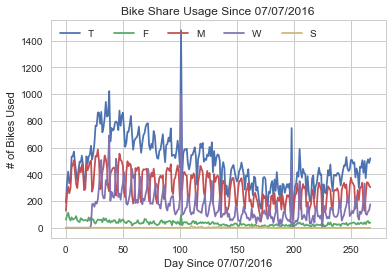

In [9]:
import matplotlib.pyplot as plt
x = np.arange(0,268)
total = np.asarray([x for x in dataFrame.groupby("Time Since Start")["Duration"].count()])
flex = np.asarray(find_counts(dataFrame, "Flex Pass"))
monthly = np.asarray(find_counts(dataFrame, "Monthly Pass"))
walkup = np.asarray(find_counts(dataFrame, "Walk-up"))
staff = np.asarray(find_counts(dataFrame, "Staff Annual"))

%matplotlib inline
sns.set()
sns.set_style("whitegrid")
plt.plot(x, total)
plt.plot(x, flex)
plt.plot(x, monthly)
plt.plot(x, walkup)
plt.plot(x, staff)

plt.legend('TFMWS', ncol=5, loc='upper left')
plt.title('Bike Share Usage Since 07/07/2016')
plt.ylabel('# of Bikes Used')
plt.xlabel('Day Since 07/07/2016')

### How many riders include bike sharing as a regular part of their commute

Considering that monthy pass holders are very likely to be commuters, we can take the average of the daily bike usage monday through friday for this time series.

The graph Bike Share Usage Since 07/07/2016 displays the total number of bikes used by each type of pass holder. T signifies total, F represents flex pass holders, M represents monthly pass holders, W represents walk ups, and S represents Staff. From this graph we can deduce monthly pass holders and walk ups make up the biggest demographic group in total bike share users and in total cyclical demand of bikes. As the number of bikes used by monthly users spikes, the number of walk ups jumps down and vice versa. This can further lead to the conclusion that there is an inverse relationship between the two groups. After further analyizing the data, it is clear that monthly users are commuters because their total usage is highest during the work week (Monday - Friday). On the other hand, walk ups are much more frequent during the weekends meaning that walk ups are very likely recreational users.

Accoriding to the boxplot of Bike Share Usage among Monthly Pass Holders, the median of total daily bike usage by monthly users is 300 bikes. If we deduct the fact that these pass holders have to commute to and from work, we get a total of around 150 clients. If we include the total amount of flex pass holders and staff, we can total our number of daily commuters to around 180 clients.

In [10]:
monthly = np.asarray(find_counts(dataFrame, "Monthly Pass"))
# Since first data point is a thursday, we have to sort out the saturdays and sundays and then calculate our average.

#### Without removing saturdays and sundays we get an average of 301.74 monthly users. After removing saturdays , we get an average of 300 users.

In [11]:
monthly.mean()

301.74626865671644

In [12]:
lst  = list(monthly)
day = 3
for index, value in enumerate(lst):
    if day == 6 or day == 5:
        lst.pop(index)
    day = (day + 1) % 7
sum(lst)/len(lst)

300.0625

#### Boxplots of the Average BIke Usage Amongst Monthly Passes

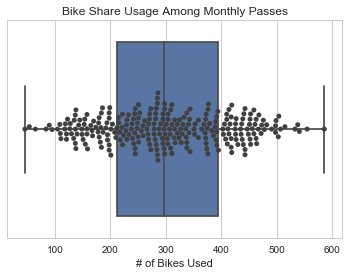

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = monthly)
ax = sns.swarmplot(x = monthly, color = '.25')
plt.title('Bike Share Usage Among Monthly Passes')
plt.xlabel('# of Bikes Used')

### Is there a net change of bikes over the course of a day? If so, when and where should bikes be transported in order to make sure bikes match travel patterns?

From looking at the bar chart of total bike usage per hour, we can see that the most frequently used hour is 6 pm. This is during rush hour in L.A. It makes sense that total demand for a bike increases dramatically during that time period because people are trying to get home as fast as possible.

If we assume that most monthly commuters are monthly pass holders, we can see a different bar chart. There are spikes at 9 am, 1 pm and 6 pm. This can be account for in mornign rush hour, lunch, and rush hour back home.

In the morning, it would be smart to allocate many bikes in the station (34.063179, -118.24588); during lunch break, it would be smart to allocate many bikes in the station (34.04681, -118.24353); finnaly, during rush hour post work it would be smart to allocate many bikes to the station (34.04855, -118.25904799999999).

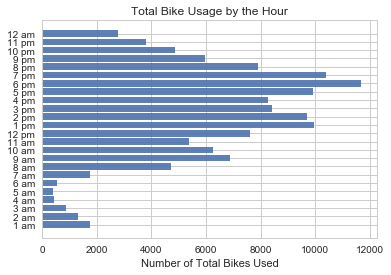

In [14]:
hours = [0] * 24
for index, value in dataFrame.iterrows():
    hours[value["Hour_Day"]] += 1
hours
sns.set(style="whitegrid")
objects = ("1 am","2 am","3 am","4 am","5 am","6 am","7 am","8 am","9 am","10 am","11 am","12 pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10 pm","11 pm","12 am")
y_pos = np.arange(len(objects))
performance = hours
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Total Bikes Used')
plt.title('Total Bike Usage by the Hour')
plt.show()

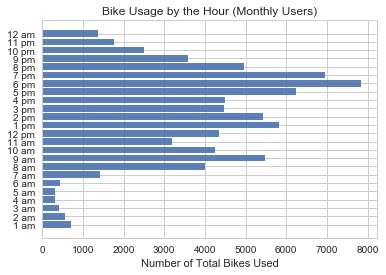

In [15]:
monthlyData = dataFrame[dataFrame.Type == 0]
hours = [0] * 24
for index, value in monthlyData.iterrows():
    hours[value["Hour_Day"]] += 1
hours
sns.set(style="whitegrid")
objects = ("1 am","2 am","3 am","4 am","5 am","6 am","7 am","8 am","9 am","10 am","11 am","12 pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10 pm","11 pm","12 am")
y_pos = np.arange(len(objects))
performance = hours
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Total Bikes Used')
plt.title('Bike Usage by the Hour (Monthly Users)')
plt.show()

#### Most common starting station overall

In [16]:
print(f"The most common starting station latitude is {float(dataFrame['Starting Station Latitude'].mode())}")
print(f"The most common starting station longitude is {float(dataFrame['Starting Station Longitude'].mode())}")

The most common starting station latitude is 34.04652
The most common starting station longitude is -118.24353


#### Most common ending station overall

In [17]:
print(f"The most common ending station latitude is {float(dataFrame['Ending Station Latitude'].mode())}")
print(f"The most common ending station longitude is {float(dataFrame['Ending Station Longitude'].mode())}")

The most common ending station latitude is 34.04855
The most common ending station longitude is -118.24353


### Analysis of commuters (Monthly users)

Let's find the most popular starting station for each hour during peak demand hours

In [18]:
stage1 = monthlyData[monthlyData.Hour_Day == 9]
stage2 = monthlyData[monthlyData.Hour_Day == 13]
stage3 = monthlyData[monthlyData.Hour_Day == 18]
morning = (float(stage1["Starting Station Latitude"].mode()), float(stage1["Starting Station Longitude"].mode()))
lunch = (float(stage2["Starting Station Latitude"].mode()), float(stage2["Starting Station Longitude"].mode()))
postwork = (float(stage3["Starting Station Latitude"].mode()), float(stage3["Starting Station Longitude"].mode()))
print(f"The most common starting station during morning rush hour is {morning}")
print(f"The most common starting station during lunch is {lunch}")
print(f"The most common starting station during post-work rush hour is {postwork}")

The most common starting station during morning rush hour is (34.063179, -118.24588)
The most common starting station during lunch is (34.04681, -118.24353)
The most common starting station during post-work rush hour is (34.04855, -118.25904799999999)


In [19]:
morning = (float(stage1["Starting Station Latitude"].mode()), float(stage1["Ending Station Longitude"].mode()))
lunch = (float(stage2["Starting Station Latitude"].mode()), float(stage2["Ending Station Longitude"].mode()))
postwork = (float(stage3["Starting Station Latitude"].mode()), float(stage3["Ending Station Longitude"].mode()))
print(f"The most common ending station during morning rush hour is {morning}")
print(f"The most common ending station during lunch is {lunch}")
print(f"The most common ending station during post-work rush hour is {postwork}")

The most common ending station during morning rush hour is (34.063179, -118.25904799999999)
The most common ending station during lunch is (34.04681, -118.24353)
The most common ending station during post-work rush hour is (34.04855, -118.25244099999999)


### What is the breakdown of Trip Route Category-Passholder type combinations? What might make a particular combination more popular?

After grouping together trips that have common passholder type, the following conclusions can be made. Monthly users are much more likely to take one way trips - 77099 one way trips vs. 3765.0 round trips. This furthers the argument that monthly users are commuters. Walk up users use one way trips far more often than round trips - 32322 one way trips vs. 8446 trips. Flex users are also more likely to use one way trips - 8981 one way trips vs. 483 round trips. Finally, staff are also more likely to be one way users - 286.0 one way trips vs. 80.0 round trips. Since one way trips are far more popular overall, Metro Bike Share could give discounts to those who want to make round trips so that profitablility in that route category can increase. As the demand increases, the amount of revenue generated will outweigh the total discounted price.

#### Monthly users

In [20]:
monthlyData.groupby(["Trip Route Category"]).describe()

Bike ID                                                   \
                       count         mean         std     min     25%     50%   
Trip Route Category                                                             
One Way              77099.0  6193.923371  293.845822  4727.0  5955.0  6192.0   
Round Trip            3765.0  6199.888977  288.241836  4727.0  5967.0  6197.0   

                                    Duration              ...  Trip_type       \
                        75%     max    count         mean ...        75%  max   
Trip Route Category                                       ...                   
One Way              6434.0  6728.0  77099.0   743.399525 ...        1.0  1.0   
Round Trip           6437.0  6728.0   3769.0  1540.864951 ...        0.0  0.0   

                        Type                                     
                       count mean  std  min  25%  50%  75%  max  
Trip Route Category                                              
One Way              77099.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Round Trip            3769.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 112 columns]

#### Walk up users

In [21]:
walkup = dataFrame[dataFrame.Type == 2]
walkup.groupby(["Trip Route Category"]).describe()

Bike ID                                                   \
                       count         mean         std     min     25%     50%   
Trip Route Category                                                             
One Way              32322.0  6192.955108  293.670594  4727.0  5951.0  6182.0   
Round Trip            8446.0  6195.476794  290.931691  4727.0  5958.0  6187.0   

                                    Duration              ...  Trip_type       \
                        75%     max    count         mean ...        75%  max   
Trip Route Category                                       ...                   
One Way              6434.0  6728.0  32323.0  2212.500696 ...        1.0  1.0   
Round Trip           6434.0  6728.0   8447.0  4111.225287 ...        0.0  0.0   

                        Type                                     
                       count mean  std  min  25%  50%  75%  max  
Trip Route Category                                              
One Way              32323.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
Round Trip            8447.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  

[2 rows x 112 columns]

#### Flex users

In [22]:
flex = walkup = dataFrame[dataFrame.Type == 1]
flex.groupby(["Trip Route Category"]).describe()

Bike ID                                                   \
                      count         mean         std     min     25%     50%   
Trip Route Category                                                            
One Way              8981.0  6192.173255  291.907353  4727.0  5951.0  6185.0   
Round Trip            483.0  6157.631470  297.637685  4727.0  5931.0  6130.0   

                                    Duration              ...  Trip_type       \
                        75%     max    count         mean ...        75%  max   
Trip Route Category                                       ...                   
One Way              6436.0  6728.0   8981.0   988.226255 ...        1.0  1.0   
Round Trip           6386.5  6726.0    483.0  2549.565217 ...        0.0  0.0   

                       Type                                     
                      count mean  std  min  25%  50%  75%  max  
Trip Route Category                                             
One Way              8981.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Round Trip            483.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 112 columns]

#### Staff users

In [23]:
staff = walkup = dataFrame[dataFrame.Type == 3]
staff.groupby(["Trip Route Category"]).describe()

Bike ID                                                    \
                      count         mean         std     min      25%     50%   
Trip Route Category                                                             
One Way               286.0  6224.506993  293.985090  5718.0  5933.75  6237.0   
Round Trip             80.0  6201.650000  324.515339  4728.0  5971.75  6190.0   

                                     Duration              ...  Trip_type  \
                         75%     max    count         mean ...        75%   
Trip Route Category                                        ...              
One Way              6478.75  6728.0    287.0  3129.825784 ...        1.0   
Round Trip           6432.75  6690.0     83.0   522.650602 ...        0.0   

                           Type                                     
                     max  count mean  std  min  25%  50%  75%  max  
Trip Route Category                                                 
One Way              1.0  287.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
Round Trip           0.0   83.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  

[2 rows x 112 columns]